# RED WINE QUALITY

OBJECTIVE: Use machine learning to determine which physiochemical properties make that red wine good.On the data we have 1599 samples and 12 parameters to determine the quality of Red Wine.This dataset can be viewed as classification task. Quality of wine is rated from 0-10.Input variables (based on physicochemical tests) and output variable  alcohol is  based on sensory data:
Attribute Information:
Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide
7 - total sulfur dioxide 
8 - density
9 - pH 
10 - sulphates 
11 - alcohol Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Importing  the libraries 

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [231]:
data=pd.read_csv("RedWineQuality.csv")
ds=pd.DataFrame(data=data)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [232]:
#parameters
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [233]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [234]:
#we have 1599 rows and 12 columns in our dataset
data.shape

(1599, 12)

In [235]:
#counting quality column
data['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [236]:
#Statistical info
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [237]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Preprocessing Data

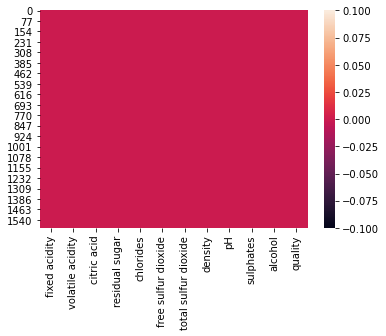

In [238]:
#plotting heatmap
sns.heatmap(data.isnull())
plt.show()

In [239]:
#Checking Null Values
ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values

In [240]:
#Checking columns
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [241]:
#Checking correlation
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Charts And Plots

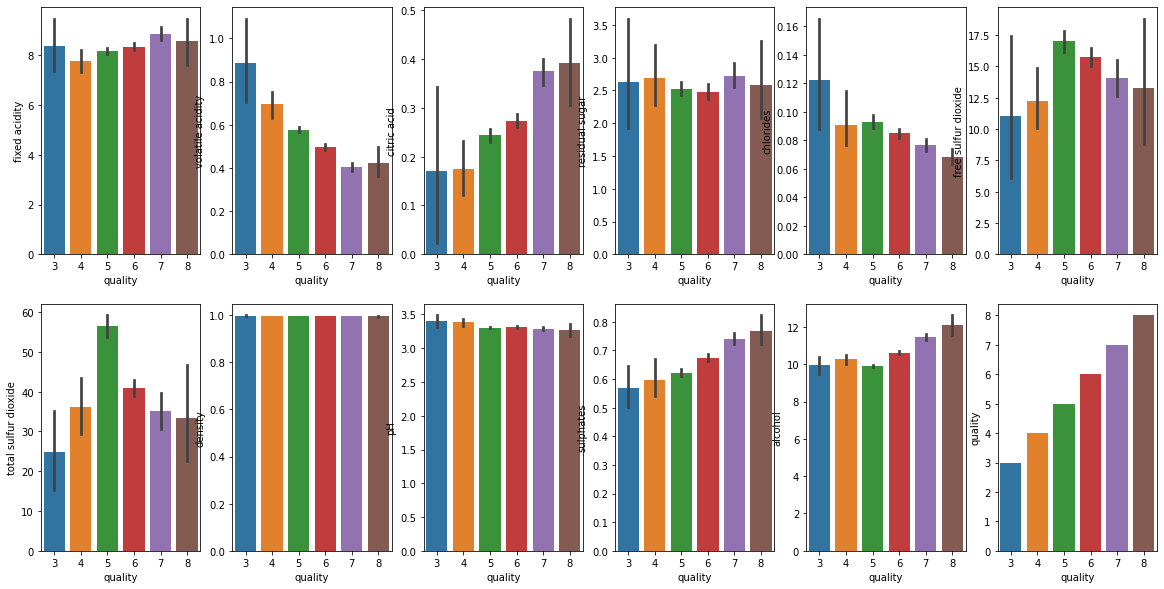

In [242]:
#plotting all attributes against quality attribute to find patterns
fig,ax= plt.subplots(ncols=6,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in ds.items():
    if col != 'type':
        sns.barplot(x='quality', y=col , data=ds, ax=ax[index])
        index+=1

fixed acidity              AxesSubplot(0.125,0.787927;0.227941x0.0920732)
volatile acidity        AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
citric acid             AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
residual sugar             AxesSubplot(0.125,0.677439;0.227941x0.0920732)
chlorides               AxesSubplot(0.398529,0.677439;0.227941x0.0920732)
free sulfur dioxide     AxesSubplot(0.672059,0.677439;0.227941x0.0920732)
total sulfur dioxide       AxesSubplot(0.125,0.566951;0.227941x0.0920732)
density                 AxesSubplot(0.398529,0.566951;0.227941x0.0920732)
pH                      AxesSubplot(0.672059,0.566951;0.227941x0.0920732)
sulphates                  AxesSubplot(0.125,0.456463;0.227941x0.0920732)
alcohol                 AxesSubplot(0.398529,0.456463;0.227941x0.0920732)
quality                 AxesSubplot(0.672059,0.456463;0.227941x0.0920732)
dtype: object

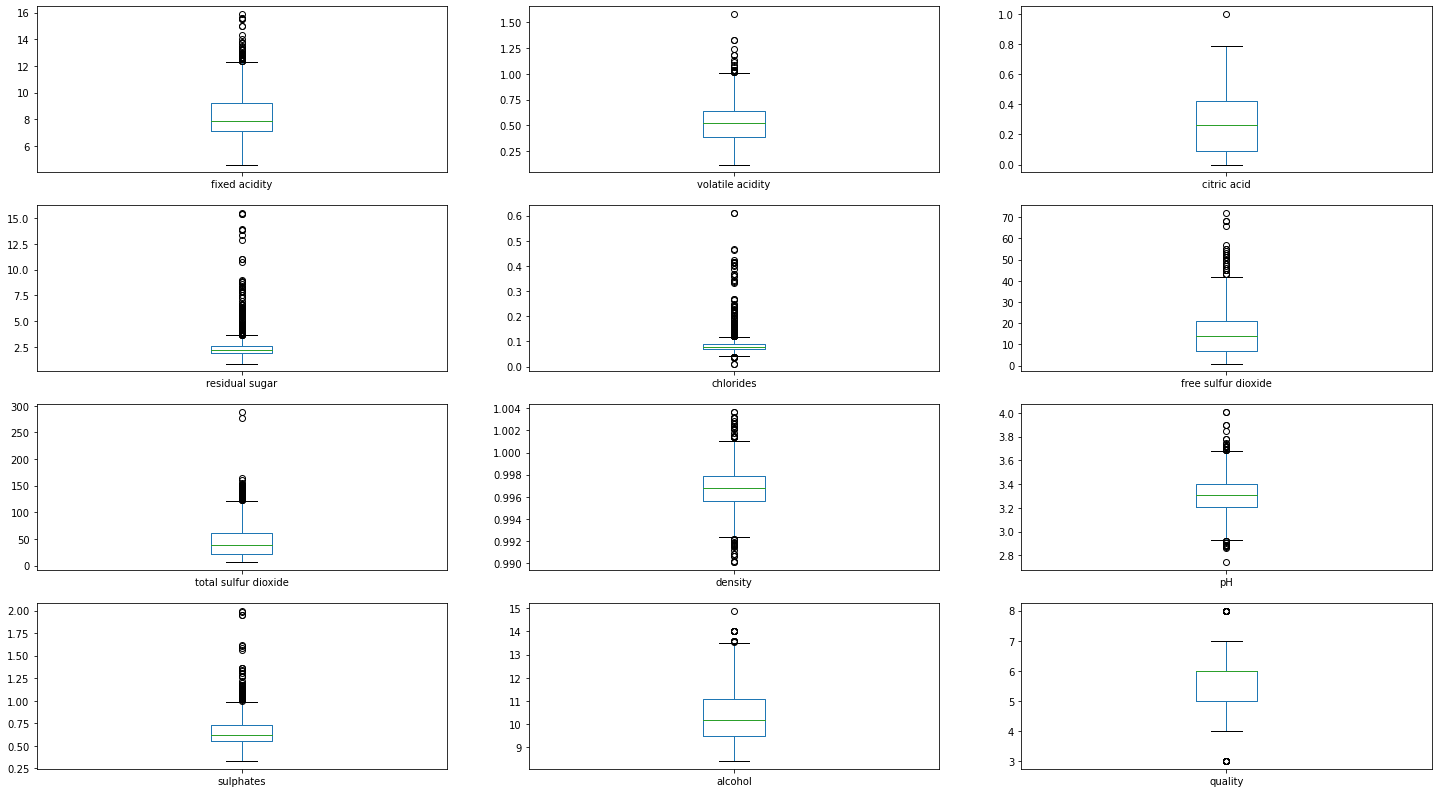

In [250]:
data.plot(kind='box',subplots=True, layout=(7,3),figsize=(25,25))

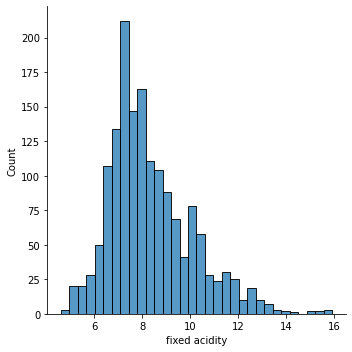

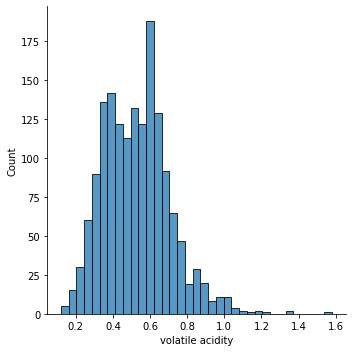

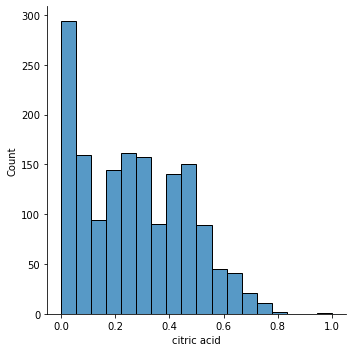

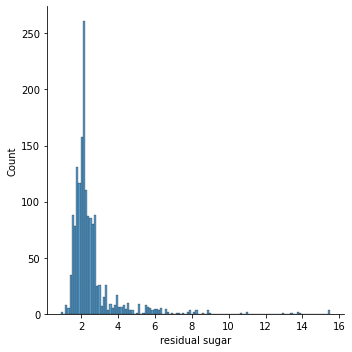

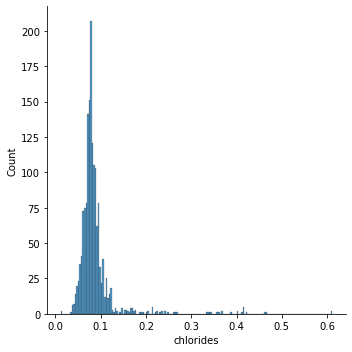

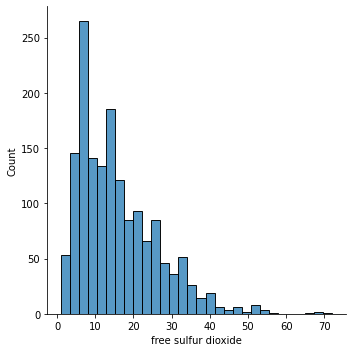

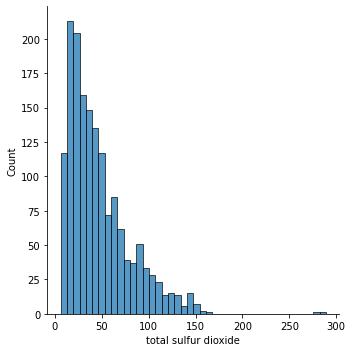

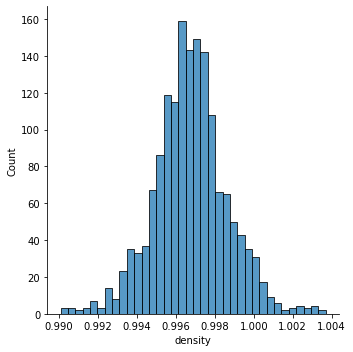

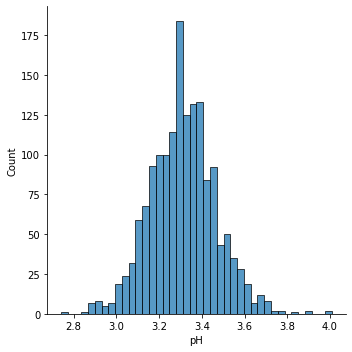

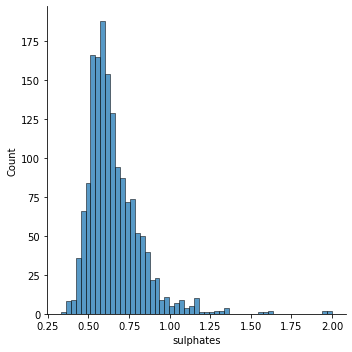

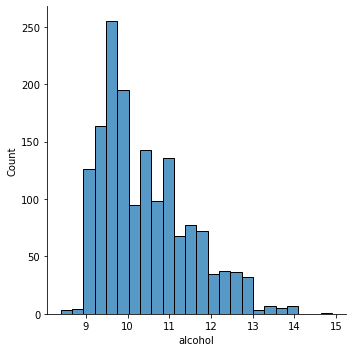

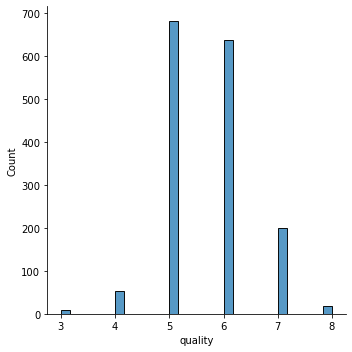

In [251]:
for i in data.describe().columns:
    sns.displot(data[i])
    plt.show()

In [218]:
#counting columns of quality parameter
data['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [219]:
# Classifying wine quality as Good or Bad based on quality rating
# "Bad" or 0 if quality is in range (1,6) including 6
# 'Good' or 1 if quality is in range (7,10)

ds['quality']=ds['quality'].apply(lambda x: 1 if x>6 else 0)
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:xlabel='quality', ylabel='count'>

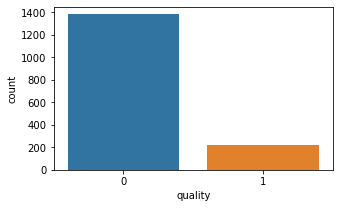

In [220]:
#Bar plot 'Good 1' vs 'Bad 0'
fig = plt.figure(figsize=(5,3))
sns.countplot(ds['quality'])

Majority is 'Bad 0'

# Train Test Split

In [221]:
#Separating independent and dependent values.Let's create x and y split.
y=data['quality']
x=data.drop('quality',axis=1)

In [222]:
#Using the best random test to create the new train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

In [223]:
#applying standard scaling to the dataset, as there is huge difference in data in some columns.
sc=StandardScaler()

x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

# Creating Algorithm

DECISION TREE ALGORITHM

In [224]:
dtc= DecisionTreeClassifier()   # creating decisiontree classifier
dtc.fit(x_train,y_train)        #training the model
dtc.score(x_train,y_train)      #scoring
preddtc=dtc.predict(x_test)      #predicting the value
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))  #checking the classification report

0.85
[[250  23]
 [ 25  22]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.49      0.47      0.48        47

    accuracy                           0.85       320
   macro avg       0.70      0.69      0.70       320
weighted avg       0.85      0.85      0.85       320



Accuracy of the model using Decision Tree Algorithm is 84.68%.  From the classification report we got the accuracy,precision,re call,f1-score etc.

# SVC

In [225]:
sv= SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred=sv.predict(x_test)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

0.875
[[268   5]
 [ 35  12]]


Here we got accuracy of  87.5%

# Tuning Algorithm To Best Parameters

In [226]:
#Finding parameters for svc

param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
grid_sv = GridSearchCV(sv, param_grid = param, scoring='accuracy', cv=10)

In [227]:
grid_sv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [228]:
print("Best parmeters for svc :", grid_sv.best_params_)

Best parmeters for svc : {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


In [229]:
#Let’s run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))

Confusion matrix
[[271   2]
 [ 31  16]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320

Accuracy score 0.896875


Accuracy score improved to 89.68% with tuning